In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import plotly.graph_objects as go
from datetime import datetime


In [3]:
df = pd.read_excel ('BankNiftyFutures_Data5Min.xlsx')
df.head()

,Ticker,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year
0,BANKNIFTY_F1,2015-01-01,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015
1,BANKNIFTY_F1,2015-01-01,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015
2,BANKNIFTY_F1,2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015
3,BANKNIFTY_F1,2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015
4,BANKNIFTY_F1,2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015


In [4]:
from datetime import datetime
def convert_datetime(dt):
    return datetime.strftime(dt, '%Y-%m-%d %H:%M-%S')

df['date1']= df ['Date'].apply(convert_datetime)

df['date2'] = df['date1'].apply(lambda x : x[:-8])

df['date'] = df['date2'].astype(str)+' '+df['Time'].astype(str)

df1=df[['date','Open 5','High 5','Low 5','Close 5','Volume 5']]

df1['Date'] = pd.to_datetime(df['date'])
df1=df1.drop(['date'], axis = 1)

df2=df1.copy()

df2.set_index(df2['Date'], inplace=True)
df2.head()

<ipython-input-4-f52067db75f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df['date'])


,Open 5,High 5,Low 5,Close 5,Volume 5,Date
Date,,,,,,
2015-01-01 09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015-01-01 09:20:00
2015-01-01 09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015-01-01 09:25:00
2015-01-01 09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015-01-01 09:30:00
2015-01-01 09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015-01-01 09:35:00
2015-01-01 09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015-01-01 09:40:00


In [5]:
ohlcv_dict = {
 'Open 5': 'first',
 'High 5': 'max',
 'Low 5': 'min',
 'Close 5': 'last',
 'Volume 5': 'sum'
}

In [6]:
#converting 5min to 15 min
df2 = df2.resample('15T').agg(ohlcv_dict)
df2.head()

,Open 5,High 5,Low 5,Close 5,Volume 5
Date,,,,,
2015-01-01 09:15:00,18861.3496,18867.9492,18793.0,18829.0000,125750
2015-01-01 09:30:00,18826.9492,18833.4004,18775.0,18803.9492,105125
2015-01-01 09:45:00,18803.9492,18850.0000,18800.0,18846.8008,79575
2015-01-01 10:00:00,18846.9004,18858.5996,18830.0,18850.0000,47300
2015-01-01 10:15:00,18848.5508,18858.0000,18830.0,18840.2500,27800


In [7]:
df3 = df2.dropna()

In [8]:
df3.head()

,Open 5,High 5,Low 5,Close 5,Volume 5
Date,,,,,
2015-01-01 09:15:00,18861.3496,18867.9492,18793.0,18829.0000,125750
2015-01-01 09:30:00,18826.9492,18833.4004,18775.0,18803.9492,105125
2015-01-01 09:45:00,18803.9492,18850.0000,18800.0,18846.8008,79575
2015-01-01 10:00:00,18846.9004,18858.5996,18830.0,18850.0000,47300
2015-01-01 10:15:00,18848.5508,18858.0000,18830.0,18840.2500,27800


In [9]:
df3 = df3.rename(columns = {"Open 5":"Open"}) 
df3 = df3.rename(columns = {"High 5":"High"}) 
df3 = df3.rename(columns = {"Close 5":"Close"}) 
df3 = df3.rename(columns = {"Volume 5":"Volume"})
df3 = df3.rename(columns = {"Low 5":"Low"}) 


In [10]:
df3.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01 09:15:00,18861.3496,18867.9492,18793.0,18829.0000,125750
2015-01-01 09:30:00,18826.9492,18833.4004,18775.0,18803.9492,105125
2015-01-01 09:45:00,18803.9492,18850.0000,18800.0,18846.8008,79575
2015-01-01 10:00:00,18846.9004,18858.5996,18830.0,18850.0000,47300
2015-01-01 10:15:00,18848.5508,18858.0000,18830.0,18840.2500,27800


In [13]:
df4=df3.copy()

In [15]:
df4.reset_index(level=0, inplace=True) 

In [17]:
df4.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-01 09:15:00,18861.3496,18867.9492,18793.0,18829.0000,125750
1,2015-01-01 09:30:00,18826.9492,18833.4004,18775.0,18803.9492,105125
2,2015-01-01 09:45:00,18803.9492,18850.0000,18800.0,18846.8008,79575
3,2015-01-01 10:00:00,18846.9004,18858.5996,18830.0,18850.0000,47300
4,2015-01-01 10:15:00,18848.5508,18858.0000,18830.0,18840.2500,27800


In [31]:
#mpf.plot(df4[-50:], type='candlestick', no_xgaps = True)
fig = go.Figure(data=[go.Candlestick(x=df4['Date'],
                open=df4['Open'],
                high=df4['High'],
                low=df4['Low'],
                close=df4['Close'])])

#fig.show()


In [32]:
def calculateVwap(data):
    data['TP'] = (data['High']+data['Low']+data['Close'])/3.0
    data['TradedValue']  = data['TP']*data['Volume']
    data['CumVolume'] = data['Volume'].cumsum()
    data['CumTradedValue'] = data['TradedValue'].cumsum()
    data['VWAP'] = data['CumTradedValue'] /data['CumVolume']
    return data



In [33]:
df5 = df3.groupby('Date').apply(calculateVwap)


In [67]:
df6=df5.copy()

In [68]:
df6=df6.bfill(axis ='rows')

In [69]:
df6.isnull().sum()

Open              0
High              0
Low               0
Close             0
Volume            0
TP                0
TradedValue       0
CumVolume         0
CumTradedValue    0
VWAP              0
dtype: int64

In [70]:
df6.head(10)

,Open,High,Low,Close,Volume,TP,TradedValue,CumVolume,CumTradedValue,VWAP
Date,,,,,,,,,,
2015-01-01 09:15:00,18861.3496,18867.9492,18793.0000,18829.0000,125750,18829.983067,2.367870e+09,125750,2.367870e+09,18829.983067
2015-01-01 09:30:00,18826.9492,18833.4004,18775.0000,18803.9492,105125,18804.116533,1.976783e+09,105125,1.976783e+09,18804.116533
2015-01-01 09:45:00,18803.9492,18850.0000,18800.0000,18846.8008,79575,18832.266933,1.498578e+09,79575,1.498578e+09,18832.266933
2015-01-01 10:00:00,18846.9004,18858.5996,18830.0000,18850.0000,47300,18846.199867,8.914253e+08,47300,8.914253e+08,18846.199867
2015-01-01 10:15:00,18848.5508,18858.0000,18830.0000,18840.2500,27800,18842.750000,5.238284e+08,27800,5.238284e+08,18842.750000
2015-01-01 10:30:00,18843.7500,18843.7500,18825.0000,18840.0000,14150,18836.250000,2.665329e+08,14150,2.665329e+08,18836.250000
2015-01-01 10:45:00,18836.0000,18846.2500,18828.0000,18845.0000,13325,18839.750000,2.510397e+08,13325,2.510397e+08,18839.750000
2015-01-01 11:00:00,18846.0000,18848.6992,18832.0000,18840.0996,20075,18840.266267,3.782183e+08,20075,3.782183e+08,18840.266267
2015-01-01 11:15:00,18842.0000,18889.9004,18837.4004,18870.0000,86025,18865.766933,1.622928e+09,86025,1.622928e+09,18865.766933


In [71]:
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Date'>

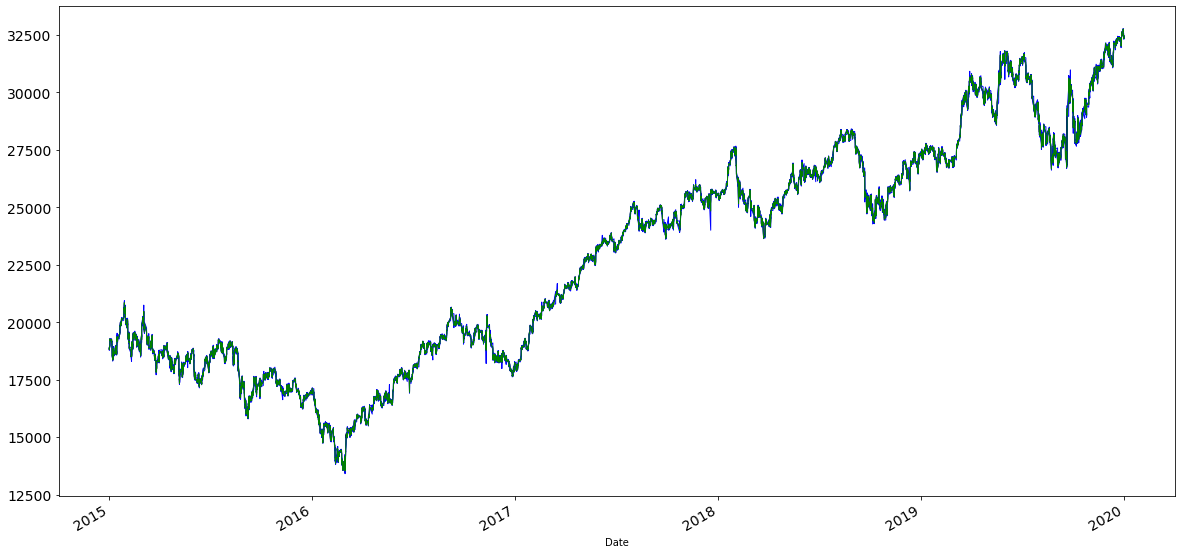

In [72]:
plt.figure(figsize = (20,10))
plt.tick_params(axis = 'both', labelsize = 14)

df6['Close'].plot(color = 'k', lw = 1, label = 'Close Price')  
df6['High'].plot(color = 'b', lw = 1, label = 'High')
df6['Low'].plot(color = 'b', lw = 1, label = 'low')
df6['VWAP'].plot(color = 'g', lw = 1, label = 'vwap') 


In [73]:
# create a new column 'Signal' such that if vwap is greater than candle 
# then set Signal as 1 else 0.

df6['Signal'] = 0.0  
df6['Signal'] = np.where(df6['Close'] > df6['VWAP'], 1.0, 0.0) 


In [77]:
df7=df6[['Open','Close','VWAP', 'Signal']]

In [78]:
df7.head()

,Open,Close,VWAP,Signal
Date,,,,
2015-01-01 09:15:00,18861.3496,18829.0000,18829.983067,0.0
2015-01-01 09:30:00,18826.9492,18803.9492,18804.116533,0.0
2015-01-01 09:45:00,18803.9492,18846.8008,18832.266933,1.0
2015-01-01 10:00:00,18846.9004,18850.0000,18846.199867,1.0
2015-01-01 10:15:00,18848.5508,18840.2500,18842.750000,0.0
